In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from pathlib import Path
from glob import glob

BASE_PATH = Path("/home/lorisg96/SE3D/datasets/ShapeNetVox32")

In [4]:
voxel_paths = glob(str(BASE_PATH) + "/**/*.binvox", recursive=True)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import data_utils
import binvox

def load_model(path):
    numpy_model = binvox.Binvox.read(path, mode='dense').numpy().astype(np.uint8)*255
    return numpy_model


def plot_model(voxel_cube):
    # Create a figure and a 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get the indices of non-zero elements (where the voxel is present)
    x, z, y = np.where(voxel_cube)

    # Plot the voxels
    ax.scatter(x, y, z, marker='x', s=50, c='b', alpha=0.5)

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    plt.show()

class_assignment = data_utils.shapenet_class_dict(BASE_PATH / "class_assignment.txt")

def get_classname_from_path(path):
    stem = str(path).split("/")[-3]
    return class_assignment[stem]

Class chair



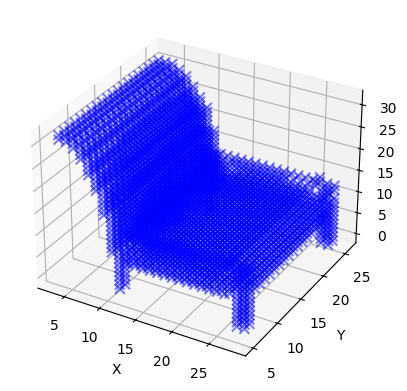

In [6]:
path = voxel_paths[-36103]

print(f"Class {get_classname_from_path(path)}")
numpy_model = load_model(path)
plot_model(numpy_model)